### 2 Body Problem Equal Masses

In [ ]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor

n_orbits = 100
dt =0.001
times = np.arange(0,n_orbits*(2*np.pi), dt)
coordinates=["barycentric","jacobi","whds","democraticheliocentric"]
errors = np.zeros((len(coordinates),len(times)))
x0 = np.zeros((len(coordinates),len(times)))
y0 = np.zeros((len(coordinates),len(times)))
x1 = np.zeros((len(coordinates),len(times)))
y1 = np.zeros((len(coordinates),len(times)))
def run_sim(coord):
    sim = rebound.Simulation()
    # if coord == "barycentric":    
    #     sim.start_server()
    sim.integrator = "whfast"
    c = coordinates.index(coord)
    if (coord == "jacobi") or (coord == "barycentric"):
        sim.ri_whfast.corrector = 11
    sim.ri_whfast.coordinates = coord
    sim.add(m=1.)
    sim.add(m=1.,a=1.,e=0)
    sim.move_to_com()
    sim.dt = dt
    ei = sim.energy()
    for t,time in enumerate(times):
        if t % 10000 == 0:
            print(f"{coord}: {(t/len(times))*100}%")
        sim.integrate(time)
        errors[c,t] = np.abs((sim.energy() - ei)/ei)
        x0[c,t] = sim.particles[0].x
        y0[c,t] = sim.particles[0].y
        x1[c,t] = sim.particles[1].x
        y1[c,t] = sim.particles[1].y
        #sim.move_to_com()
    #sim.status()
    sim = None

with ThreadPoolExecutor() as executor:
    executor.map(run_sim, coordinates)

fig, axs = plt.subplots(2, 2, figsize=(12,12))
axs = axs.flatten()
axs[0].set_title("Barycentric")
axs[0].scatter(x0[0],y0[0],label="barycentric",s=0.3, color="red")
axs[0].plot(x1[0],y1[0],label="barycentric",lw=0.5, color="blue")
axs[1].set_title("Jacobi")
axs[1].scatter(x0[1],y0[1],label="jacobi",s=0.3, color="red")
axs[1].plot(x1[1],y1[1],label="jacobi",lw=0.5, color="blue")
axs[2].set_title("WHDS")
axs[2].scatter(x0[2],y0[2],label="whds",s=0.3, color="red")
axs[2].plot(x1[2],y1[2],label="whds",lw=0.5, color="blue")
axs[3].scatter(x0[3],y0[3],label="democraticheliocentric",s=0.3, color="red")
axs[3].plot(x1[3],y1[3],label="democraticheliocentric",lw=0.5, color="blue")
plt.show()

fig = plt.figure(figsize=(16,9))
plt.title("Total Relative Energy Error")
plt.plot(times,errors[0],label="Barycentric",lw=2, color="red", alpha=0.4)
plt.plot(times,errors[1],label="Jacobi",lw=1, color="blue", alpha=0.3)
plt.plot(times,errors[2],label="WHDS",lw=1, color="green", alpha=0.3)
plt.plot(times,errors[3],label="Democratic Heliocentric",lw=1, color="orange", alpha=0.3)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Relative Energy Error", fontsize=12)
plt.yscale("log")
plt.xscale("log")
plt.legend(loc="upper left",fontsize=12)
plt.grid()
plt.show()
fig.savefig("/home/luke/AST424/rebound/rebound/testing_barycentric/energy_error_2_body.png", dpi=600)

jacobi: 0.0%
barycentric: 0.0%
whds: 0.0%
democraticheliocentric: 0.0%
whds: 1.591548242214544%
democraticheliocentric: 1.591548242214544%
whds: 3.183096484429088%
democraticheliocentric: 3.183096484429088%
whds: 4.774644726643632%
whds: 6.366192968858176%
democraticheliocentric: 4.774644726643632%
whds: 7.957741211072719%
democraticheliocentric: 6.366192968858176%
whds: 9.549289453287264%
democraticheliocentric: 7.957741211072719%
whds: 11.140837695501807%
democraticheliocentric: 9.549289453287264%
whds: 12.732385937716352%
democraticheliocentric: 11.140837695501807%
whds: 14.323934179930895%
democraticheliocentric: 12.732385937716352%
whds: 15.915482422145438%
barycentric: 1.591548242214544%
jacobi: 1.591548242214544%
democraticheliocentric: 14.323934179930895%
whds: 17.50703066435998%
whds: 19.098578906574527%
democraticheliocentric: 15.915482422145438%
whds: 20.69012714878907%
democraticheliocentric: 17.50703066435998%
whds: 22.281675391003613%
democraticheliocentric: 19.0985789065

### Circumbinary

In [ ]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor

n_orbits = 10
dt =1e-3
times = np.arange(0,n_orbits*(2*np.pi), dt)
coordinates=["barycentric","jacobi","whds","democraticheliocentric"]
errors = np.zeros((len(coordinates),len(times)))
x0 = np.zeros((len(coordinates),len(times)))
y0 = np.zeros((len(coordinates),len(times)))
x1 = np.zeros((len(coordinates),len(times)))
y1 = np.zeros((len(coordinates),len(times)))
x2 = np.zeros((len(coordinates),len(times)))
y2 = np.zeros((len(coordinates),len(times)))
def run_sim(coord):
    sim = rebound.Simulation()
    # if coord == "barycentric":    
    #     sim.start_server()
    sim.integrator = "whfast"
    c = coordinates.index(coord)
    if coord == "barycentric":
        sim.ri_whfast.corrector = 11
    sim.ri_whfast.coordinates = coord
    sim.add(m=1.)       # Star A
    sim.add(m=1., a=1.) # Star B
    sim.add(a=2.)       # Circumbinary planet ABb
    sim.move_to_com()
    sim.dt = dt
    ei = sim.energy()
    for t,time in enumerate(times):
        if t % 10000 == 0:
            print(f"{coord}: {(t/len(times))*100}%")
        sim.integrate(time)
        errors[c,t] = np.abs((sim.energy() - ei)/ei)
        x0[c,t] = sim.particles[0].x
        y0[c,t] = sim.particles[0].y
        x1[c,t] = sim.particles[1].x
        y1[c,t] = sim.particles[1].y
        x2[c,t] = sim.particles[2].x
        y2[c,t] = sim.particles[2].y
        #sim.move_to_com()
    #sim.status()
    sim = None

with ThreadPoolExecutor() as executor:
    executor.map(run_sim, coordinates)

fig, axs = plt.subplots(2, 2, figsize=(12,12))
axs = axs.flatten()
axs[0].set_title("Barycentric")
axs[0].scatter(x0[0],y0[0],label="barycentric",s=0.3, color="red")
axs[0].plot(x1[0],y1[0],label="barycentric",lw=0.5, color="blue")
axs[0].plot(x2[0],y2[0],label="barycentric",lw=0.5, color="green")

axs[1].set_title("Jacobi")
axs[1].scatter(x0[1],y0[1],label="jacobi",s=0.3, color="red")
axs[1].plot(x1[1],y1[1],label="jacobi",lw=0.5, color="blue")
axs[1].plot(x2[1],y2[1],label="jacobi",lw=0.5, color="green")

axs[2].set_title("WHDS")
axs[2].scatter(x0[2],y0[2],label="whds",s=0.3, color="red")
axs[2].plot(x1[2],y1[2],label="whds",lw=0.5, color="blue")
axs[2].plot(x2[2],y2[2],label="whds",lw=0.5, color="green")

axs[3].scatter(x0[3],y0[3],label="democraticheliocentric",s=0.3, color="red")
axs[3].plot(x1[3],y1[3],label="democraticheliocentric",lw=0.5, color="blue")
axs[3].plot(x2[3],y2[3],label="democraticheliocentric",lw=0.5, color="green")
plt.show()

fig = plt.figure(figsize=(16,9))
plt.title("Total Relative Energy Error")
plt.plot(times,errors[0],label="Barycentric",lw=2, color="red", alpha=0.4)
plt.plot(times,errors[1],label="Jacobi",lw=1, color="blue", alpha=0.3)
# plt.plot(times,errors[2],label="WHDS",lw=1, color="green", alpha=0.3)
# plt.plot(times,errors[3],label="Democratic Heliocentric",lw=1, color="orange", alpha=0.3)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Relative Energy Error", fontsize=12)
plt.yscale("log")
plt.xscale("log")
plt.legend(loc="upper left",fontsize=12)
plt.grid()
plt.show()
fig.savefig("/home/luke/AST424/rebound/rebound/testing_barycentric/energy_error_2_body.png", dpi=600)

### Transformation Error with Random Initial Conditions

  0%|          | 0/4 [00:00<?, ?it/s]

jacobi: 0.0%whds: 0.0%democraticheliocentric: 0.0%


barycentric: 0.0%


100%|██████████| 4/4 [00:00<00:00,  4.97it/s]


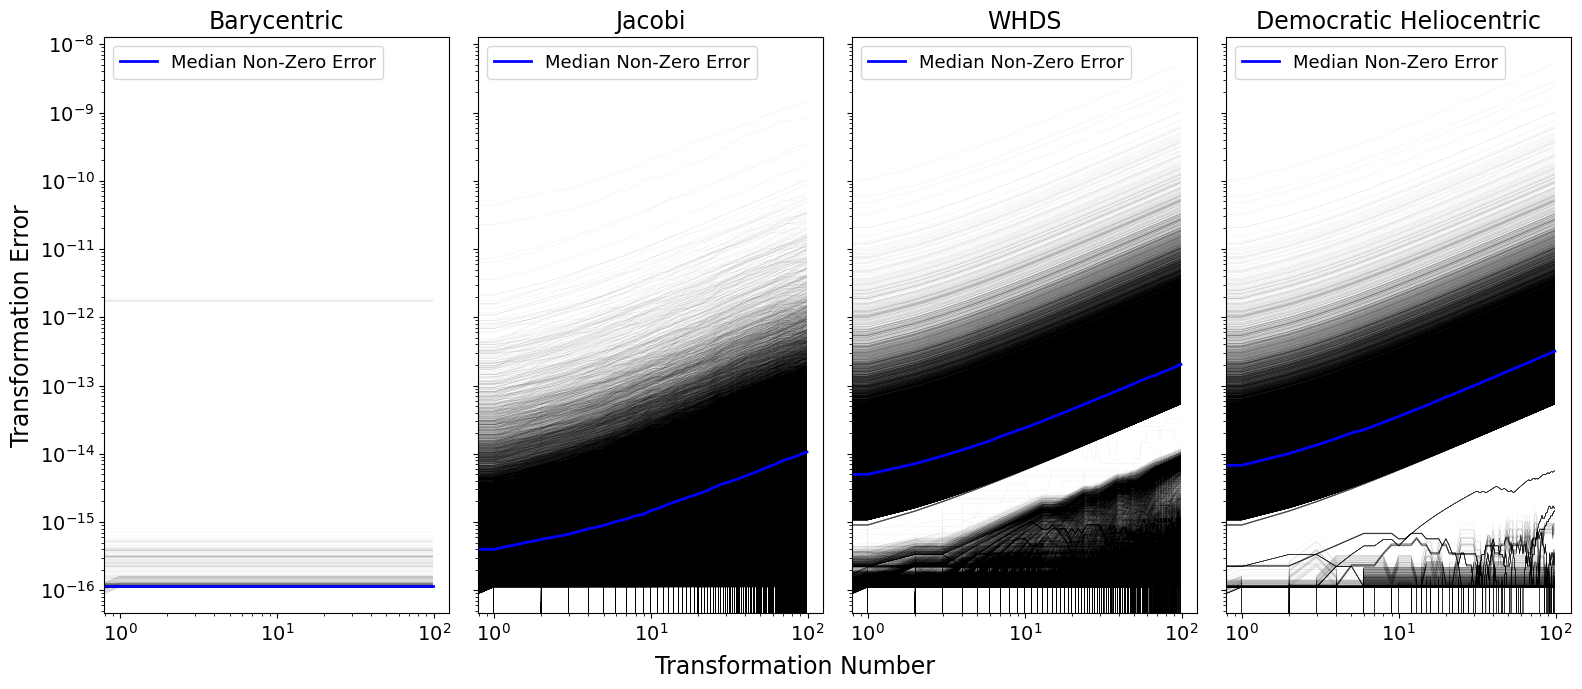

In [ ]:
import rebound
import ctypes
import numpy as np
import numpy.ma as ma
import tqdm
import matplotlib.pyplot as plt
from concurrent.futures import ProcessPoolExecutor

# n_bodies = 10000
# n_transforms = 4000
n_bodies = 100
n_transforms = 100
min=-10
max=10
m = np.abs(np.random.uniform(0.01,2,n_bodies))
x = np.random.uniform(min,max,n_bodies)
y = np.random.uniform(min,max,n_bodies)
z = np.random.uniform(min,max,n_bodies)
vx = np.random.uniform(min,max,n_bodies)
vy = np.random.uniform(min,max,n_bodies)
vz = np.random.uniform(min,max,n_bodies)

def get_particle_properties(sim):
    properties = np.zeros((sim.N,6))
    for i,p in enumerate(sim.particles):
        properties[i] = [p.x,p.y,p.z,p.vx,p.vy,p.vz]
    return properties               

def transformation_error_single(coordinate, n_transforms):
    errors = np.zeros((n_transforms, n_bodies, 6))
    sim = rebound.Simulation()
    for n in range(n_bodies):
        sim.add(m=m[n],x=x[n],y=y[n],z=z[n],vx=vx[n],vy=vy[n],vz=vz[n])
    elems = (rebound.Particle * sim.N)()
    p = ctypes.cast(elems,ctypes.POINTER(rebound.Particle))
    cl = rebound.clibrebound
    transform_from_inertial = getattr(cl,f"reb_particles_transform_inertial_to_{coordinate}_posvel")
    transform_to_inertial = getattr(cl,f"reb_particles_transform_{coordinate}_to_inertial_posvel")
    p0 = get_particle_properties(sim)
    for t in range(n_transforms):
        if t % 1000 == 0:
            print (f"{coordinate}: {(t/n_transforms)*100}%")
        if coordinate == "jacobi":
            transform_from_inertial(sim._particles,p,sim._particles,sim.N,sim.N)
            transform_to_inertial(sim._particles,p,sim._particles,sim.N,sim.N)
        else:
            transform_from_inertial(sim._particles,p,sim.N,sim.N)
            transform_to_inertial(sim._particles,p,sim.N,sim.N)
        errors[t] = np.abs((get_particle_properties(sim)-p0)/p0)
    sim = None
    return errors

def plot_errors(errors, coords):
    fig, axs = plt.subplots(1, 4, figsize=(16,7),sharex=True,sharey=True)
    axs = axs.flatten()
    for c, coord in enumerate(coords):
        axs[c].cla()
        axs[c].set_title(coord, fontsize = 17, fontweight="medium")
        axs[c].set_xscale("log")
        axs[c].set_yscale("log")

        # Set larger tick sizes for better readability
        for ax in axs:
            ax.tick_params(axis='both', which='major', labelsize=14)
            ax.tick_params(axis='both', which='minor', labelsize=14)
            
        for i in range(6):
            for n in range(n_bodies):
                axs[c].plot(range(n_transforms), errors[c][:, n, i], lw=0.075, alpha=0.3, color = "black")
        # median of non-zero errors
        errors_merged = errors[c].reshape(n_transforms, n_bodies*6)
        errors_merged[errors_merged == 0] = np.nan
        median = np.nanmedian(errors_merged, axis=1)
        axs[c].plot(range(n_transforms), median, lw=2.0, color="blue", label = "Median Non-Zero Error")
        axs[c].legend(loc="upper left", fontsize=13)
    axs[0].set_ylabel("Transformation Error", fontsize=17, fontweight="medium")
    fig.text(0.5, 0.03, 'Transformation Number', ha='center', fontsize=17, fontweight="medium")
    plt.tight_layout(rect=[0,0.05,1,1])
    plt.show()
    fig.savefig("transformation_errors_random.png", dpi=650)

def transformation_error(coordinates, n_transforms):
    with ProcessPoolExecutor(max_workers=24) as executor:
        results = list(tqdm.tqdm(executor.map(transformation_error_single, coordinates, [n_transforms] * len(coordinates)), total=len(coordinates)))
    return np.array(results)

errors = transformation_error(["barycentric", "jacobi", "whds", "democraticheliocentric"], n_transforms)
plot_errors(errors, ["Barycentric", "Jacobi", "WHDS", "Democratic Heliocentric"])

### Outer Solar System

In [ ]:
import rebound
from rebound import data
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
from time import sleep

n_orbits = 20
dt =1e-3
times = np.arange(0,n_orbits*(2*np.pi), dt)
coordinates=["barycentric","jacobi","whds","democraticheliocentric"]
errors = np.zeros((len(coordinates),len(times)))
#a = np.zeros((len(coordinates),len(times),2))
x0 = np.zeros((len(coordinates),len(times)))
y0 = np.zeros((len(coordinates),len(times)))
x1 = np.zeros((len(coordinates),len(times)))
y1 = np.zeros((len(coordinates),len(times)))
x2 = np.zeros((len(coordinates),len(times)))
y2 = np.zeros((len(coordinates),len(times)))
x3 = np.zeros((len(coordinates),len(times)))
y3 = np.zeros((len(coordinates),len(times)))
x4 = np.zeros((len(coordinates),len(times)))
y4 = np.zeros((len(coordinates),len(times)))

def run_sim(coord):
    sim = rebound.Simulation()
    sim.integrator = "whfast"
    c = coordinates.index(coord)
    data.add_outer_solar_system(sim)
    sim.move_to_com()
    sim.ri_whfast.coordinates = coord
    sim.ri_whfast.corrector = 11;
    sim.dt = dt
    ei = sim.energy()
    for t,time in enumerate(times):
        if t % 10000 == 0:
            print(f"{coord}: {(t/len(times))*100}%")
        sim.integrate(time)
        #orbits = sim.orbits()
        # for o,orbit in enumerate(orbits):
        #     a[c,t,o] = orbit.a
        errors[c,t] = np.abs((sim.energy() - ei)/ei)
        x0[c,t] = sim.particles[0].x
        y0[c,t] = sim.particles[0].y
        x1[c,t] = sim.particles[1].x
        y1[c,t] = sim.particles[1].y
        x2[c,t] = sim.particles[2].x
        y2[c,t] = sim.particles[2].y
        x3[c,t] = sim.particles[3].x
        y3[c,t] = sim.particles[3].y
        x4[c,t] = sim.particles[4].x
        y4[c,t] = sim.particles[4].y
    #sim = None

with ThreadPoolExecutor(max_workers=24) as executor:
    executor.map(run_sim, coordinates)
 

fig, axs = plt.subplots(2, 2, figsize=(14,14))
axs = axs.flatten()
axs[0].set_title("Barycentric")
axs[0].scatter(x0[0],y0[0],label="barycentric",lw=0.4, color="red")
axs[0].plot(x1[0],y1[0],label="barycentric",lw=0.4, color="blue")
axs[0].plot(x2[0],y2[0],label="barycentric",lw=0.4, color="green")
axs[0].plot(x3[0],y3[0],label="barycentric",lw=0.4, color="orange")
axs[0].plot(x4[0],y4[0],label="barycentric",lw=0.4, color="purple")

axs[1].set_title("Jacobi")
axs[1].scatter(x0[1],y0[1],label="jacobi",lw=0.4, color="red")
axs[1].plot(x1[1],y1[1],label="jacobi",lw=0.4, color="blue")
axs[1].plot(x2[1],y2[1],label="jacobi",lw=0.4, color="green")
axs[1].plot(x3[1],y3[1],label="jacobi",lw=0.4, color="orange")
axs[1].plot(x4[1],y4[1],label="jacobi",lw=0.4, color="purple")

axs[2].set_title("WHDS")
axs[2].scatter(x0[2],y0[2],label="whds",lw=0.4, color="red")
axs[2].plot(x1[2],y1[2],label="whds",lw=0.4, color="blue")
axs[2].plot(x2[2],y2[2],label="whds",lw=0.4, color="green")
axs[2].plot(x3[2],y3[2],label="whds",lw=0.4, color="orange")
axs[2].plot(x4[2],y4[2],label="whds",lw=0.4, color="purple")

axs[3].set_title("Democratic Heliocentric")
axs[3].scatter(x0[3],y0[3],label="democraticheliocentric",lw=0.4, color="red")
axs[3].plot(x1[3],y1[3],label="democraticheliocentric",lw=0.4, color="blue")
axs[3].plot(x2[3],y2[3],label="democraticheliocentric",lw=0.4, color="green")
axs[3].plot(x3[3],y3[3],label="democraticheliocentric",lw=0.4, color="orange")
axs[3].plot(x4[3],y4[3],label="democraticheliocentric",lw=0.4, color="purple")
plt.show()

fig = plt.figure(figsize=(20,10))
plt.title("Total Relative Energy Error", fontsize=16)
plt.plot(times,errors[0],label="Barycentric",lw=0.7, color="red", alpha=0.6)
plt.plot(times,errors[1],label="Jacobi",lw=0.7, color="blue", alpha=0.6)
plt.plot(times,errors[2],label="WHDS",lw=0.7, color="green", alpha=0.6)
plt.plot(times,errors[3],label="Democratic Heliocentric",lw=0.7, color="orange", alpha=0.6)
plt.xlabel("Time", fontsize=16)
plt.ylabel("Relative Energy Error", fontsize=16)
plt.yscale("log")
plt.xscale("log")
plt.grid()
plt.legend(loc="upper left")
#fig.savefig("rebound/testing_barycentric/energy_error_solar_system.png", dpi=600)

# fig = plt.figure(figsize=(10,5))
# plt.title("Semi-Major Axis")
# plt.plot(times, a[0,:,0], label="barycentric",lw=0.1, color="blue", alpha=0.6)
# plt.plot(times, a[1,:,0], label="jacobi",lw=0.9, color="red", alpha=0.2)
# plt.xscale("log")
# plt.yscale("log")
# plt.legend()
# plt.show()

### 2 Bodies with Central Mass

In [ ]:
# 2 bodies with stationary central mass

import rebound
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
n_orbits = 25
dt =1e-3
times = np.arange(0,n_orbits*(2*np.pi), dt)
coordinates=["barycentric","jacobi","whds","democraticheliocentric"]
errors = np.zeros((len(coordinates),len(times)))
#a = np.zeros((len(coordinates),len(times),2))
x0 = np.zeros((len(coordinates),len(times)))
y0 = np.zeros((len(coordinates),len(times)))
x1 = np.zeros((len(coordinates),len(times)))
y1 = np.zeros((len(coordinates),len(times)))
x2 = np.zeros((len(coordinates),len(times)))
y2 = np.zeros((len(coordinates),len(times)))
def run_sim(coord):
    sim = rebound.Simulation()
    sim.integrator = "whfast"
    c = coordinates.index(coord)
    sim.add(m=1.)
    sim.add(m=.1,x=3.,vy=0.5)
    sim.add(m=.1,x=-3.,vy=-0.5)
    sim.move_to_com()
    sim.ri_whfast.coordinates = coord
    sim.dt = dt
    ei = sim.energy()
    for t,time in enumerate(times):
        if t % 10000 == 0:
            print(f"{coord}: {(t/len(times))*100}%")
        sim.integrate(time)
        #orbits = sim.orbits()
        # for o,orbit in enumerate(orbits):
        #     a[c,t,o] = orbit.a
        errors[c,t] = np.abs((sim.energy() - ei)/ei)
        x0[c,t] = sim.particles[0].x
        y0[c,t] = sim.particles[0].y
        x1[c,t] = sim.particles[1].x
        y1[c,t] = sim.particles[1].y
        x2[c,t] = sim.particles[2].x
        y2[c,t] = sim.particles[2].y
    sim = None


with ThreadPoolExecutor() as executor:
    executor.map(run_sim, coordinates)

fig, axs = plt.subplots(2, 2, figsize=(14,14))
axs = axs.flatten()
axs[0].set_title("Barycentric")
axs[0].scatter(x0[0],y0[0],label="barycentric",lw=0.5, color="red")
axs[0].plot(x1[0],y1[0],label="barycentric",lw=0.5, color="blue")
axs[0].plot(x2[0],y2[0],label="barycentric",lw=0.5, color="green")
axs[1].set_title("Jacobi")
axs[1].scatter(x0[1],y0[1],label="jacobi",lw=0.5, color="red")
axs[1].plot(x1[1],y1[1],label="jacobi",lw=0.5, color="blue")
axs[1].plot(x2[1],y2[1],label="jacobi",lw=0.5, color="green")
axs[2].set_title("WHDS")
axs[2].scatter(x0[2],y0[2],label="whds",lw=0.5, color="red")
axs[2].plot(x1[2],y1[2],label="whds",lw=0.5, color="blue")
axs[2].plot(x2[2],y2[2],label="whds",lw=0.5, color="green")
axs[3].set_title("Democratic Heliocentric")
axs[3].scatter(x0[3],y0[3],label="democraticheliocentric",lw=1, color="red")
axs[3].plot(x1[3],y1[3],label="democraticheliocentric",lw=0.5, color="blue")
axs[3].plot(x2[3],y2[3],label="democraticheliocentric",lw=0.5, color="green")
plt.show()

fig = plt.figure(figsize=(20,10))
plt.title("Energy Error")
plt.plot(times,errors[0],label="barycentric",lw=0.7, color="red", alpha=0.6)
plt.plot(times,errors[1],label="jacobi",lw=0.7, color="blue", alpha=0.6)
plt.plot(times,errors[2],label="whds",lw=0.7, color="green", alpha=0.3)
plt.plot(times,errors[3],label="democraticheliocentric",lw=0.7, color="orange", alpha=0.3)
plt.yscale("log")
plt.xscale("log")
plt.legend()
#fig.savefig("rebound/testing_barycentric/energy_error_3_body.png", dpi=600)

# fig = plt.figure(figsize=(10,5))
# plt.title("Semi-Major Axis")
# plt.plot(times, a[0,:,0], label="barycentric",lw=0.1, color="blue", alpha=0.6)
# plt.plot(times, a[1,:,0], label="jacobi",lw=0.9, color="red", alpha=0.2)
# plt.xscale("log")
# plt.yscale("log")
# plt.legend()
# plt.show()

### 6 Bodies with Central Mass

barycentric: 0.0%
jacobi: 0.0%
democraticheliocentric: 0.0%
whds: 0.0%
whds: 15.91545709192768%
jacobi: 15.91545709192768%
barycentric: 15.91545709192768%
democraticheliocentric: 15.91545709192768%
whds: 31.83091418385536%
jacobi: 31.83091418385536%
democraticheliocentric: 31.83091418385536%
barycentric: 31.83091418385536%
jacobi: 47.74637127578304%
whds: 47.74637127578304%
barycentric: 47.74637127578304%
democraticheliocentric: 47.74637127578304%
jacobi: 63.66182836771072%
whds: 63.66182836771072%
barycentric: 63.66182836771072%
democraticheliocentric: 63.66182836771072%
jacobi: 79.5772854596384%
whds: 79.5772854596384%
barycentric: 79.5772854596384%
democraticheliocentric: 79.5772854596384%
jacobi: 95.49274255156608%
democraticheliocentric: 95.49274255156608%
barycentric: 95.49274255156608%
whds: 95.49274255156608%


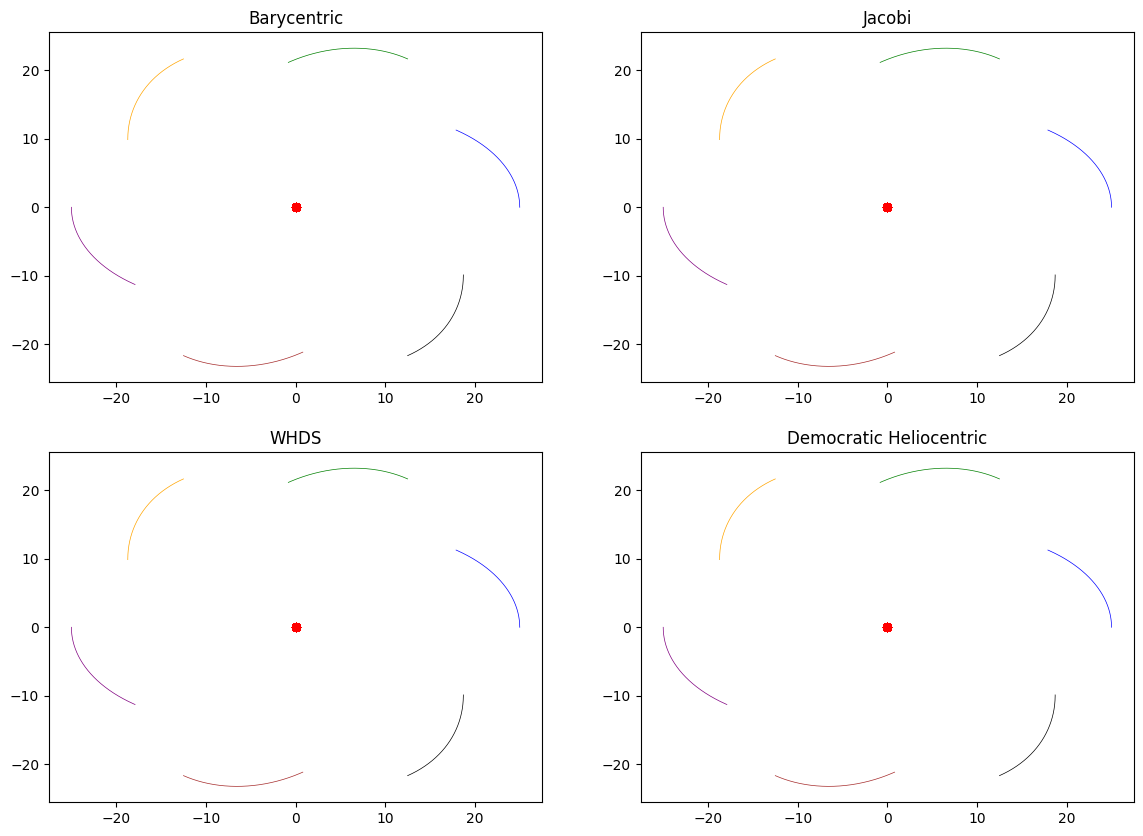

FileNotFoundError: [Errno 2] No such file or directory: 'rebound/testing_barycentric/energy_error_7_body.png'

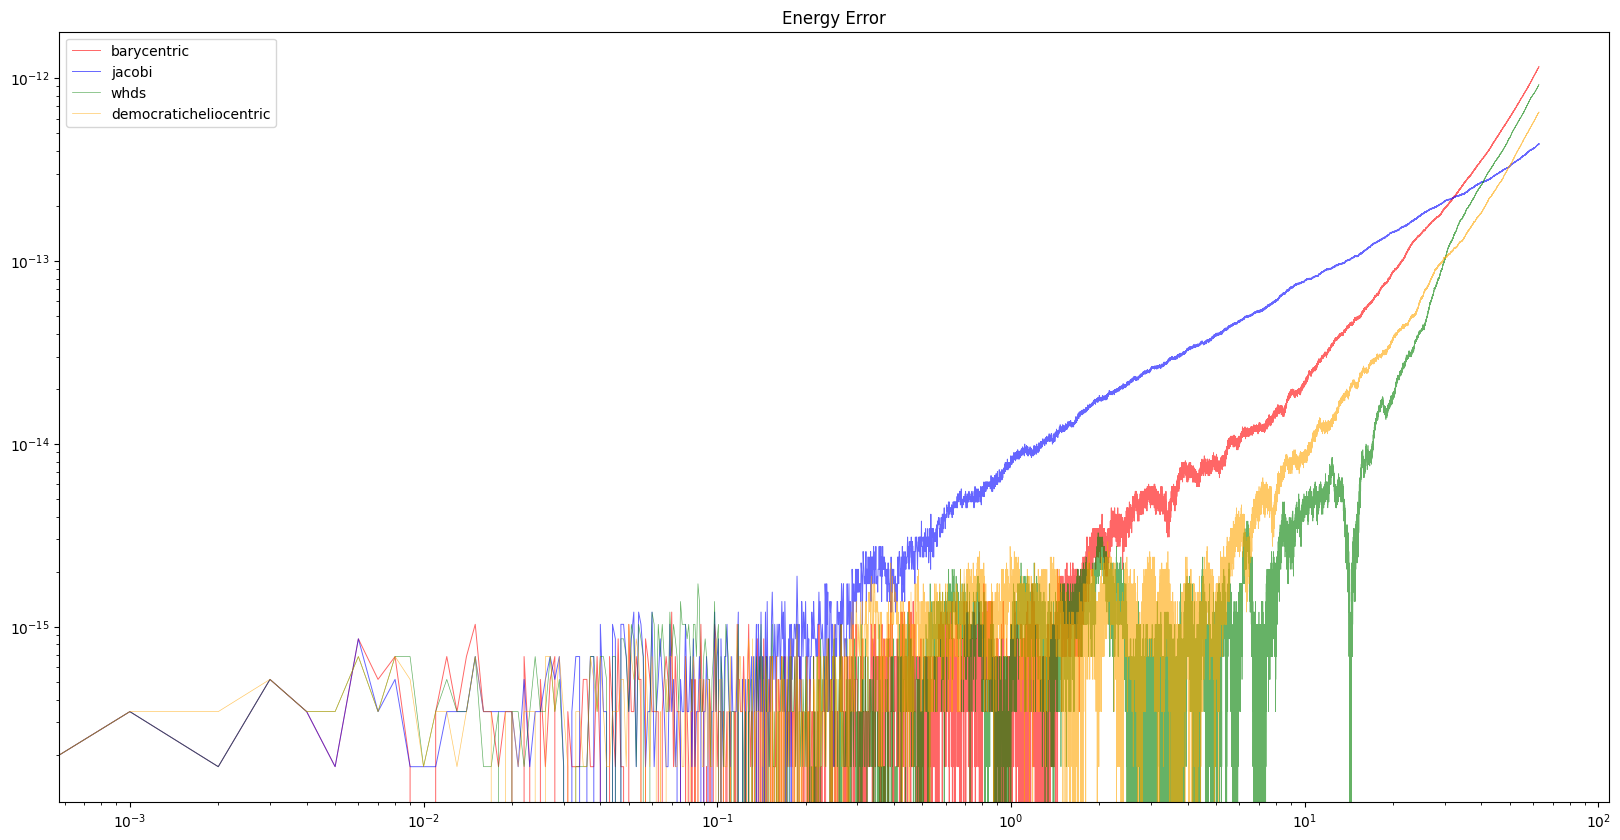

In [ ]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
n_orbits = 10
dt =1e-3
times = np.arange(0,n_orbits*(2*np.pi), dt)
coordinates=["barycentric","jacobi","whds","democraticheliocentric"]
errors = np.zeros((len(coordinates),len(times)))
x0 = np.zeros((len(coordinates),len(times)))
y0 = np.zeros((len(coordinates),len(times)))
x1 = np.zeros((len(coordinates),len(times)))
y1 = np.zeros((len(coordinates),len(times)))
x2 = np.zeros((len(coordinates),len(times)))
y2 = np.zeros((len(coordinates),len(times)))
x3 = np.zeros((len(coordinates),len(times)))
y3 = np.zeros((len(coordinates),len(times)))
x4 = np.zeros((len(coordinates),len(times)))
y4 = np.zeros((len(coordinates),len(times)))
x5 = np.zeros((len(coordinates),len(times)))
y5 = np.zeros((len(coordinates),len(times)))
x6 = np.zeros((len(coordinates),len(times)))
y6 = np.zeros((len(coordinates),len(times)))

def run_sim(coord):
    sim = rebound.Simulation()
    sim.integrator = "whfast"
    c = coordinates.index(coord)
   
    d=25
    v=0.2
    sim.add(m=2., x=0., y=0., z=0., vx=0., vy=0., vz=0.)
    for i in range(6):
        angle = i * np.pi / 3
        x = d * np.cos(angle)
        y = d * np.sin(angle)
        vx = -v * np.sin(angle)
        vy = v * np.cos(angle)
        sim.add(m=.1, x=x, y=y, z=0., vx=vx, vy=vy, vz=0.)
    
    sim.move_to_com()
    sim.ri_whfast.coordinates = coord
    sim.dt = dt
    ei = sim.energy()
    for t,time in enumerate(times):
        if t % 10000 == 0:
            print(f"{coord}: {(t/len(times))*100}%")
        sim.integrate(time)
        errors[c,t] = np.abs((sim.energy() - ei)/ei)
        x0[c,t] = sim.particles[0].x
        y0[c,t] = sim.particles[0].y
        x1[c,t] = sim.particles[1].x
        y1[c,t] = sim.particles[1].y
        x2[c,t] = sim.particles[2].x
        y2[c,t] = sim.particles[2].y
        x3[c,t] = sim.particles[3].x
        y3[c,t] = sim.particles[3].y
        x4[c,t] = sim.particles[4].x
        y4[c,t] = sim.particles[4].y
        x5[c,t] = sim.particles[5].x
        y5[c,t] = sim.particles[5].y
        x6[c,t] = sim.particles[6].x
        y6[c,t] = sim.particles[6].y

    sim = None

with ThreadPoolExecutor() as executor:
    executor.map(run_sim, coordinates)

fig, axs = plt.subplots(2, 2, figsize=(14,10))
axs = axs.flatten()
axs[0].set_title("Barycentric")
axs[0].scatter(x0[0],y0[0],label="barycentric",lw=0.5, color="red")
axs[0].plot(x1[0],y1[0],label="barycentric",lw=0.5, color="blue")
axs[0].plot(x2[0],y2[0],label="barycentric",lw=0.5, color="green")
axs[0].plot(x3[0],y3[0],label="barycentric",lw=0.5, color="orange")
axs[0].plot(x4[0],y4[0],label="barycentric",lw=0.5, color="purple")
axs[0].plot(x5[0],y5[0],label="barycentric",lw=0.5, color="brown")
axs[0].plot(x6[0],y6[0],label="barycentric",lw=0.5, color="black")


axs[1].set_title("Jacobi")
axs[1].scatter(x0[1],y0[1],label="jacobi",lw=0.5, color="red")
axs[1].plot(x1[1],y1[1],label="jacobi",lw=0.5, color="blue")
axs[1].plot(x2[1],y2[1],label="jacobi",lw=0.5, color="green")
axs[1].plot(x3[1],y3[1],label="jacobi",lw=0.5, color="orange")
axs[1].plot(x4[1],y4[1],label="jacobi",lw=0.5, color="purple")
axs[1].plot(x5[1],y5[1],label="jacobi",lw=0.5, color="brown")
axs[1].plot(x6[1],y6[1],label="jacobi",lw=0.5, color="black")

axs[2].set_title("WHDS")
axs[2].scatter(x0[2],y0[2],label="whds",lw=0.5, color="red")
axs[2].plot(x1[2],y1[2],label="whds",lw=0.5, color="blue")
axs[2].plot(x2[2],y2[2],label="whds",lw=0.5, color="green")
axs[2].plot(x3[2],y3[2],label="whds",lw=0.5, color="orange")
axs[2].plot(x4[2],y4[2],label="whds",lw=0.5, color="purple")
axs[2].plot(x5[2],y5[2],label="whds",lw=0.5, color="brown")
axs[2].plot(x6[2],y6[2],label="whds",lw=0.5, color="black")

axs[3].set_title("Democratic Heliocentric")
axs[3].scatter(x0[3],y0[3],label="democraticheliocentric",lw=0.5, color="red")
axs[3].plot(x1[3],y1[3],label="democraticheliocentric",lw=0.5, color="blue")
axs[3].plot(x2[3],y2[3],label="democraticheliocentric",lw=0.5, color="green")
axs[3].plot(x3[3],y3[3],label="democraticheliocentric",lw=0.5, color="orange")
axs[3].plot(x4[3],y4[3],label="democraticheliocentric",lw=0.5, color="purple")
axs[3].plot(x5[3],y5[3],label="democraticheliocentric",lw=0.5, color="brown")
axs[3].plot(x6[3],y6[3],label="democraticheliocentric",lw=0.5, color="black")
plt.show()

fig = plt.figure(figsize=(20,10))
plt.title("Energy Error")
plt.plot(times,errors[0],label="barycentric",lw=0.7, color="red", alpha=0.6)
plt.plot(times,errors[1],label="jacobi",lw=0.7, color="blue", alpha=0.6)
plt.plot(times,errors[2],label="whds",lw=0.5, color="green", alpha=0.6)
plt.plot(times,errors[3],label="democraticheliocentric",lw=0.5, color="orange", alpha=0.6)
plt.legend()
plt.yscale("log")
plt.xscale("log")
fig.savefig("rebound/testing_barycentric/energy_error_7_body.png", dpi=600)

# fig = plt.figure(figsize=(10,5))
# plt.title("Semi-Major Axis")
# plt.plot(times, a[0,:,0], label="barycentric",lw=0.1, color="blue", alpha=0.6)
# plt.plot(times, a[1,:,0], label="jacobi",lw=0.9, color="red", alpha=0.2)
# plt.xscale("log")
# plt.yscale("log")
# plt.legend()
# plt.show()

In [2]:
import rebound
import multiprocessing as mp
from rebound import data
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ProcessPoolExecutor
from concurrent.futures import ThreadPoolExecutor
import tqdm
from scipy import stats

coordinates = ["barycentric", "jacobi", "whds", "democraticheliocentric"]
n_coords = len(coordinates)
np.random.seed()
#n_orbits = 2 # of 2nd particle

def init_particles(sim):
    
    #outer solar system
    # data.add_outer_solar_system(sim)
    # n_orbits = 20000
    # dt = 0.026
    # t_finish = n_orbits*sim.particles[1].P
    # jupiter_p_days = 4333.0
    # t_finish_days = n_orbits*jupiter_p_days
    # n_steps = t_finish/dt
    # dt_days = t_finish_days/n_steps
    # print("dt (days): ", dt_days, "t_finish (days): ", t_finish_days)
    
    #2 body
    # dt = 1e-1
    # sim.add(m=1.)
    # sim.add(m=1.,e=0.25,a=1.)
    # t_finish=100*sim.particles[1].P
    
    # 6 body
    # sim.add(m=1., x=0., y=0., z=0., vx=0., vy=0., vz=0.)
    # ring_mass = 0.05
    # n=10
    # for i in range(n):
    #     d = 1
    #     v = np.sqrt((1. + ring_mass)*sim.G)/np.sqrt(d)
    #     angle  = i * 2 * np.pi / n
    #     x = d * np.cos(angle)
    #     y = d * np.sin(angle)
    #     z = np.random.uniform(-0.1, 0.1)
    #     vx = -v * np.sin(angle)
    #     vy = v * np.cos(angle)
    #     sim.add(m=ring_mass/6, x=x, y=y, z=0., vx=vx, vy=vy, vz=0.)
    # t_finish = 1*sim.particles[1].P
    # #sim.softening = 0.04
    # dt = 1e-2
    
    
    # # Self gravitating disk
    t_finish = 200
    N = 2500
    dt = 3e-2
    m0 = 1.0
    boxsize = 6
    disc_mass = 0.05
    # sim.boundary = 'open'
    # sim.configure_box(boxsize,3,3,1)
    x = 3/4
    sim.add(m=m0)
    sim.ri_whfast.safe_mode = 0
    sim.softening = 0.02
    r_outer =boxsize
    r_inner = boxsize/8
    for i in range(N):
        #a = stats.powerlaw.rvs(a=x) * (r_outer - r_inner) + r_inner
        a = np.random.uniform(r_inner, r_outer)
        #a = np.random.normal(boxsize/2, boxsize/4)
        phi = np.random.uniform(0, 2*np.pi)
        # mu = m0 + disc_mass * (pow(a,-x)-pow(r_inner,-x)) / (pow(r_outer,-x)-pow(r_inner,-x))
        v_kep = np.sqrt((sim.G*(1.0 + disc_mass))/a)
        z_val = a*np.random.normal(0,0.15)
        sim.add(m=disc_mass/N, 
                x=a*np.cos(phi), 
                y=a*np.sin(phi), 
                z=z_val,
                vx=v_kep*np.sin(phi),
                vy=-v_kep*np.cos(phi), 
                vz = 0)
        
    ##########
    sim.dt = dt
    times = np.arange(0, t_finish, dt)
    x = np.zeros((sim.N, len(times)))
    y = np.zeros((sim.N, len(times)))
    z = np.zeros((sim.N, len(times)))
    return x, y, z, times
    
def run_sim(coord):
    sim = rebound.Simulation()
    sim.integrator = "whfast"
    x,y,z,times = init_particles(sim)
    sim.move_to_com()
    energy_errors = np.zeros(len(times))
    if (coord == "barycentric"):
        sim.start_server()
        #sim.ri_whfast.corrector = 11
    sim.ri_whfast.coordinates = coord
    e_initial = sim.energy()
    for i, t in enumerate(times):
        sim.integrate(t)
        energy_errors[i] = np.abs((sim.energy() - e_initial)/e_initial)
        for j in range(sim.N):
            x[j, i] = sim.particles[j].x
            y[j, i] = sim.particles[j].y
            z[j, i] = sim.particles[j].z
    sim = None
    return energy_errors, x, y, z, times

with ProcessPoolExecutor(max_workers=24, mp_context=mp.get_context('fork')) as executor:
    results = list(tqdm.tqdm(executor.map(run_sim, coordinates), total=len(coordinates)))
x = np.array([r[1] for r in results])
y = np.array([r[2] for r in results])
z = np.array([r[3] for r in results])
energy_errors = np.array([r[0] for r in results])
times = results[0][4]

np.savez('simulation_results_long_cor.npz', 
         x=x, 
         y=y, 
         z=z, 
         energy_errors=energy_errors, 
         times=times, 
         coordinates=coordinates)
print("Results saved to npz")

# fig, axs = plt.subplots(2, 2, figsize=(10,10))
# axs = axs.flatten()
# for i, coord in enumerate(coordinates):
#     axs[i].set_title(coord)
#     axs[i].scatter(x[i, 0], y[i, 0], s=1.0, color="red")
#     for j in range(1,x.shape[1]):
#         axs[i].plot(x[i, j], y[i, j], lw=2.2, alpha=0.1, color="black")
# plt.show()
    
# fig = plt.figure(figsize=(10,5))
# plt.title("Energy Error")
# for i, coord in enumerate(coordinates):
#     plt.plot(times, energy_errors[i], label=coord, lw=1.0, alpha=0.6)
# plt.yscale("log")
# plt.xscale("log")
# plt.legend()
# plt.show()

  0%|          | 0/4 [00:00<?, ?it/s]

REBOUND Webserver listening on http://localhost:1234 ...


  0%|          | 0/4 [00:29<?, ?it/s]Process ForkProcess-43:
Process ForkProcess-39:
Process ForkProcess-40:
Process ForkProcess-31:
Process ForkProcess-46:
Process ForkProcess-35:
Process ForkProcess-41:
Process ForkProcess-48:
Process ForkProcess-32:
Process ForkProcess-47:
Process ForkProcess-37:
Process ForkProcess-42:
Process ForkProcess-29:
Process ForkProcess-38:
Process ForkProcess-34:
Process ForkProcess-30:
Process ForkProcess-36:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkProcess-33:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceb

KeyboardInterrupt: 

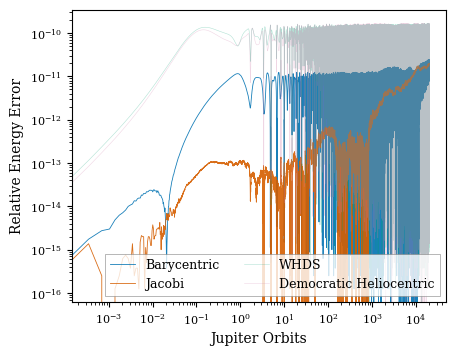

In [ ]:
import rebound
import numpy as np
import rebound.data as data
import matplotlib.pyplot as plt
loaded_results = np.load('simulation_results_long_cor.npz')
x = loaded_results['x']
y = loaded_results['y']
z = loaded_results['z']
energy_errors = loaded_results['energy_errors']
times = loaded_results['times']
coordinates = loaded_results['coordinates']


sim = rebound.Simulation()
data.add_outer_solar_system(sim)
p = sim.particles[1].P

coordinates = ["Barycentric", "Jacobi", "WHDS", "Democratic Heliocentric"]
plt.rcParams.clear()
plt.rcParams.update({
    "text.usetex": False, 
    "font.family": "serif",
    "axes.labelsize": 10,
    "font.size": 10,
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
})

fig = plt.figure(figsize=(4.5, 3.5)) 
colors = ['#0072B2', '#D55E00', '#009E73', '#CC79A7']
linestyles = ['-', '-', '-', '-']
linewidths = [0.6, 0.6, 0.4, 0.4]
# for i, coord in enumerate(coordinates):
#     plt.plot(times/p, energy_errors[i], label=coord, linestyle=linestyles[i], linewidth=linewidths[i], alpha=0.6)
for i, coord in enumerate(coordinates):
    alpha = 0.9
    if coord == "WHDS" or coord == "Democratic Heliocentric":
        alpha = 0.3
    plt.plot(times/p, energy_errors[i], label=coord, linestyle=linestyles[i], 
             linewidth=linewidths[i], color=colors[i], alpha=alpha)
plt.xlabel("Jupiter Orbits", fontweight='medium')
plt.ylabel("Relative Energy Error", fontweight='medium')
plt.yscale("log")
plt.xscale("log")
legend = plt.legend(fontsize=9, frameon=True, edgecolor='gray', 
                   fancybox=False, ncol=2, loc='lower right')
legend.get_frame().set_linewidth(0.5)
plt.tight_layout(pad=0.5)
plt.show()
fig.savefig("solar_system_cor_long.pdf", dpi=600, bbox_inches='tight')